### Example of Symbolic Regression to estimate thermal correction equation for UAS flights

Data generated by Moises Duran, TREX project.
File 'example_drone_thermal_camera_correction.csv' contains as potential predictors
- UAS tarp, air temp, RH, VPD and atmospheric pressure as redictors
- predictants (IRT) in the last colunm.

### Instructions
- if not, create a anaconda environment, e.g. pysr
- once completed, in the terminal, 
- in the pysr environment installa modules:
- conda install pysr
- conda install matplotlib

- activate environment and pass two commands:
- conda activate pysr
- python -c "import pysr
- last commands will install julia libraries, necessary to run the notebook.

Julia and Julia dependencies are installed at first import:

In [1]:
import pysr

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


Now, let's import everything else as well as the PySRRegressor:


In [2]:
import sympy
import numpy as np
from matplotlib import pyplot as plt
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Simple PySR example:


using Moises' data

In [3]:
df = pd.read_csv('example_drone_thermal_camera_correction.csv')
# print(df.head())
X = df.iloc[:,0:-1]
y = df.IRT
print(X.head())


        TARP   Tair     RH   VPD    Patm
0  36.049999  25.40  51.00  17.0  100.41
1  31.780001  27.90  42.00  16.0  100.41
2  37.439999  27.11  37.11  22.7  100.38
3  35.450001   0.25   0.50   0.7  100.41
4  33.970001  26.60  38.39  21.6  100.47


By default, we will set up 50 populations of expressions (which evolve independently except for migrations),# use 8 threads, and use `"best"` for our model selection strategy:

In [ ]:
default_pysr_params = dict(
    populations=8,    # ^ Assuming we have 4 cores, this means 2 populations per core, so one is always running.
    population_size=50, # ^ Number of equations per population
    model_selection="best", #"score" is also an option,
    random_state=0, # this line ensure reproducible results
    maxsize=20, # maximum complexity of the equations, increase to 200 for more complex equations
    deterministic=True, #   to ensure reproducible results
    parallelism='serial', # to avoid parallel computing issues on some systems, change to 'serial' if needed
    # select_k_features=10, # to automatically select few predictors from the entire set of predictor options, activate/deactive as you wish
    # denoise=True, # to remove scatteting on y, activate/deactivate as you wish
    verbosity =0,
    elementwise_loss= "L2DistLoss()",  #  (mean square)
    #niterations=10000000,  # Run forever
    #timeout_in_seconds=3600*2,  # but stop after 2 hours
    )

PySR can run for arbitrarily long, and continue to find more and more accurate expressions. You can set the total number of cycles of evolution with `niterations`, although there are also a [few more ways](https://github.com/MilesCranmer/PySR/pull/134) to stop execution.

**This first execution will take a bit longer to startup, as the library is JIT-compiled. The next execution will be much faster.**

In [5]:
# Learn equations
model = PySRRegressor(
    niterations=100, # number of optimization iterations
    binary_operators=["+", "*","-","/"],
    unary_operators=["sqrt", "exp", "log"],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    **default_pysr_params,
)

model.fit(X, y)

c:\Users\alfon\.conda\envs\PySR\Lib\site-packages\pysr\sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                               TARP   
	1   >>>>  0.388180                                   TARP * 1.1435678   
	2         0.053580                    (TARP * 1.2799759) + -5.4353766   
	3         0.094015                     (TARP - sqrt(VPD)) * 1.2876735   
	4         0.012521           (TARP * 1.332092) + (Tair * -0.28954354)   
	5         0.008890           (TARP - sqrt(VPD + 8.38172)) * 1.3217558   
	6         0.025137  ((TARP - 3.1650298) * 1.3477789) - (VPD * 0.18...   
	7         0.054351  (TARP + ((3.921179 - Tair) / log(RH))) * 1.366...   
	8         0.015828  ((TARP * 1.3687315) - ((Tair * 6.4079046) / RH...   
	9         0.005744  ((TARP + -3.506082) * 1.3638124) - (sqrt(Tair)...   
	10        0.013429  (TARP * 1.3713014) - (((Tair * 0.18042947) * (...   
	11        0.000583  ((TARP + -3.5192564) * 1.368559) - ((Tair * sq...   
	12        0.002927  ((TARP + -3.7398126) - (((Tair - log(Tair * RH...   
	13        0.001757  (((TARP + -3.8574178) - ((Tair - (log(RH) * 3....   
	
	         loss  complexity  
	0   55.320374           1  
	1   25.451645           3  
	2   22.865314           5  
	3   20.813590           6  
	4   20.554602           7  
	5   20.372690           8  
	6   19.866966           9  
	7   18.815994          10  
	8   18.520521          11  
	9   18.414442          12  
	10  18.168806          13  
	11  18.158216          14  
	12  17.999480          17  
	13  17.936337          19  
]

We can print the model, which will print out all the discovered expressions:

In [6]:
print(model)

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                               TARP   
	1   >>>>  0.388180                                   TARP * 1.1435678   
	2         0.053580                    (TARP * 1.2799759) + -5.4353766   
	3         0.094015                     (TARP - sqrt(VPD)) * 1.2876735   
	4         0.012521           (TARP * 1.332092) + (Tair * -0.28954354)   
	5         0.008890           (TARP - sqrt(VPD + 8.38172)) * 1.3217558   
	6         0.025137  ((TARP - 3.1650298) * 1.3477789) - (VPD * 0.18...   
	7         0.054351  (TARP + ((3.921179 - Tair) / log(RH))) * 1.366...   
	8         0.015828  ((TARP * 1.3687315) - ((Tair * 6.4079046) / RH...   
	9         0.005744  ((TARP + -3.506082) * 1.3638124) - (sqrt(Tair)...   
	10        0.013429  (TARP * 1.3713014) - (((Tair * 0.18042947) * (...   
	11        0.000583  ((TARP + -3.5192564) * 1.368559) - ((Tair * sq...   
	12      

We can also view the SymPy format of the best expression:

In [7]:
model.sympy()

TARP*1.1435678

We can also view the SymPy of any other expression in the list, using the index of it in `model.equations_`.

In [8]:
model.sympy(8)

TARP*1.3687315 - 4.10116 - 6.4079046*Tair/RH

## Output

`model.equations_` is a Pandas DataFrame. We can export the results in various ways:

In [9]:
model.latex()

'TARP 1.14'

These is also `model.sympy(), model.jax(), model.pytorch()`. All of these can take an index as input, to get the result for an arbitrary equation in the list.

We can also use `model.predict` for arbitrary equations, with the default equation being the one chosen by `model_selection`:

ypredict = model.predict(X)
ypredict_simpler = model.predict(X, 2)

print("Default selection MSE:", np.power(ypredict - y, 2).mean())
print("Manual selection MSE for index 2:", np.power(ypredict_simpler - y, 2).mean())

Plotting the first solutions

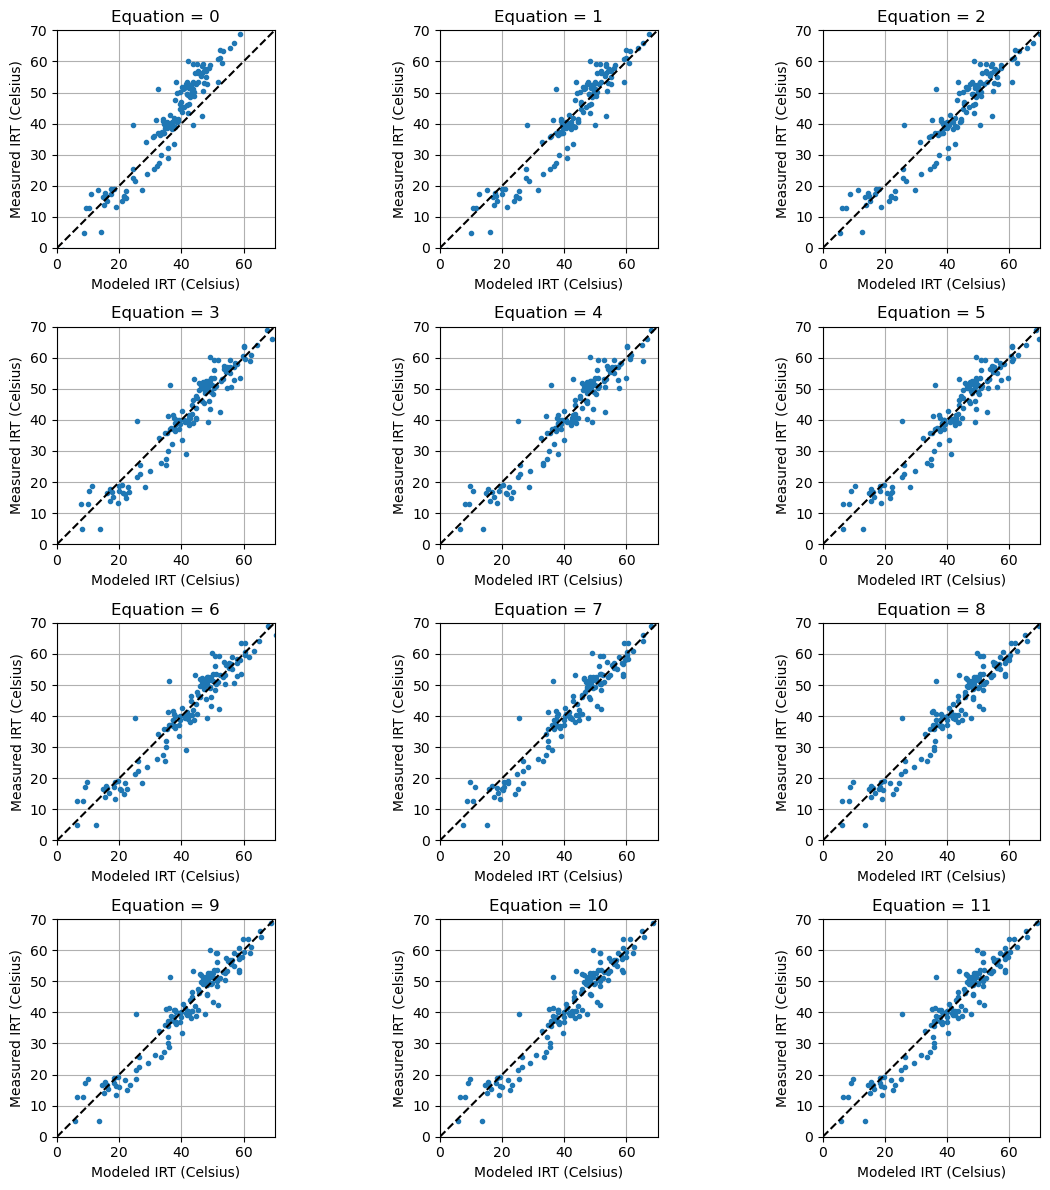

In [13]:
fig, axes = plt.subplots(4, 3, figsize=(12, 12))

it = np.linspace(0,11,12, dtype=int)  # Ensure indices are integers

# Iterate over the subplots and data
for ax, i in zip(axes.flatten(), it):  # Flatten axes for proper iteration
    ypredict_simpler = model.predict(X, index=i)  # Use integer index
    ax.plot(ypredict_simpler, y,'.')
    ax.grid(True)
    ax.set_xlabel("Modeled IRT (Celsius)")
    ax.set_ylabel("Measured IRT (Celsius)")
    ax.plot( [0,70], [0,70], linestyle='--', color='k' )

    ax.set_aspect('equal')
    ax.set_xlim(0, 70)
    ax.set_ylim(0, 70)
    mse =np.power(ypredict_simpler - y, 2).mean()
    ax.set_title('Equation = ' + str(i))
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



# Other PySR Options

The full list of PySR parameters can be found here: https://ai.damtp.cam.ac.uk/pysr/api